In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
# adjust the path accordingly
df = pd.read_csv('/content/drive/MyDrive/DIBIMBING/Day 21 - Hands On Data Science Project with Python/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
# Menampilkan 5 baris teratas dari data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# jumlah nilai yang hilang per kolom
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


tidak ada data yang hilang

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1


ternyata ada data yang hanya mengandung spasi tanpa angka dan akan dihapus baris tersebut

In [9]:
# Menghapus baris yang mengandung spasi pada kolom 'TotalCharges'
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [10]:
# Mengubah tipe data kolom 'TotalCharges' menjadi float
df['TotalCharges'] = df['TotalCharges'].astype(float)

<ipython-input-10-e7eb6ec7f2a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


In [11]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5890
1,1142


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [14]:
# mengecek duplikat data
df.duplicated().sum()

0

setelah dicek mengenai duplikat data ternyata nol

#3.Analisis Data Eksploratif (EDA):
- Lakukan EDA standar dengan interpretasi yang kaya, yang mencakup:
- Ringkasan statistik dari kolom.
- Analisis univariat, yaitu analisis satu variabel pada suatu waktu.
- Analisis multivariat, yaitu analisis yang melibatkan lebih dari satu variabel.

#Ringkasan statistik dari kolom

In [15]:
# Mengkelompokan data berdasarkan numeric dan kategorik

numeric = ['tenure','MonthlyCharges', 'TotalCharges']
kategorik = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [16]:
#Ringkasan stastistik untuk kolom numeric
df[numeric].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000



**interpretasi dari setiap kolom:**

tenure: Kolom ini mungkin mewakili lama pelanggan berlangganan dalam bulan. Rata-rata sekitar 32 bulan, dan rentang nilai dari 1 bulan hingga 72 bulan.

MonthlyCharges: Kolom ini menunjukkan biaya bulanan pelanggan. Rata-rata sekitar 64.79, dengan nilai minimum 18.25 dan maksimum 118.75.

TotalCharges: Kolom ini mungkin mewakili total biaya yang sudah dibayarkan oleh pelanggan. Rata-rata sekitar 2283.30, dengan rentang nilai yang cukup besar.

Maka dapat disimpulkan :

Dari hasil describe() ini, kita bisa mendapatkan gambaran umum tentang data numerik dalam dataset:

Distribusi data: Kita bisa melihat seberapa tersebar data pada setiap kolom.

Outlier: Kita bisa mencari nilai ekstrem (minimum atau maksimum) yang mungkin merupakan outlier atau data yang tidak wajar.

Perbandingan antar kolom: Kita bisa membandingkan rata-rata, rentang, dan statistik lainnya antar kolom untuk melihat hubungan antar variabel.

In [17]:
#Ringkasan stastistik untuk kolom kategorical
df[kategorik].describe()

,SeniorCitizen
count,7032.000000
mean,0.162400
std,0.368844
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000




Mari kita ambil contoh kolom gender:

count: Ada 7032 data yang tidak kosong untuk kolom gender, artinya ada informasi gender untuk semua 7032 pelanggan.

unique: Hanya ada 2 nilai unik, yaitu "Male" dan "Female".

top: Nilai yang paling sering muncul adalah "Male" dengan frekuensi 3549 kali.
Ini berarti dalam dataset tersebut, terdapat 7032 pelanggan, dan sebagian besar (3549 orang) adalah laki-laki.

Apa yang Bisa Kita Simpulkan?

Dari output categorical_columns.describe(), kita dapat:

Memahami distribusi data: Melihat seberapa sering setiap kategori muncul dalam data.
Mengenali kategori mayoritas: Mengetahui kategori mana yang paling banyak atau paling sedikit muncul.
Menemukan nilai yang unik: Melihat apakah ada nilai yang tidak sesuai atau jarang muncul.

In [18]:
df['Churn'].value_counts(normalize=True).reset_index() # Bukti bahwa mayoritas customer tidak churn

,Churn,proportion
0,No,0.734215
1,Yes,0.265785


maka dapat dijelaskan bahwa data churn ini imbalance yang nantinya akan dicoba mengunakan heandling imbalance.

#Analisis univariat, yaitu analisis satu variabel pada suatu waktu.

Analisis Univariat untuk Kolom Numerik:

- Menampilkan statistik deskriptif
- Membuat histogram untuk melihat distribusi
- Membuat boxplot untuk mengidentifikasi outlier

In [19]:
# Membuat histogram dan boxplot untuk setiap kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


###Membuat histogram untuk melihat distribusi

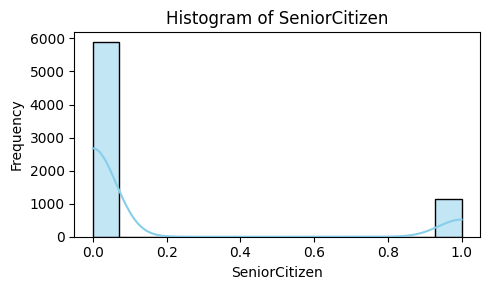

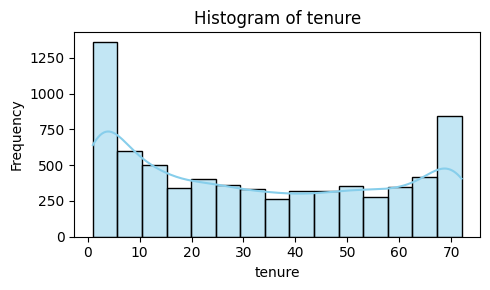

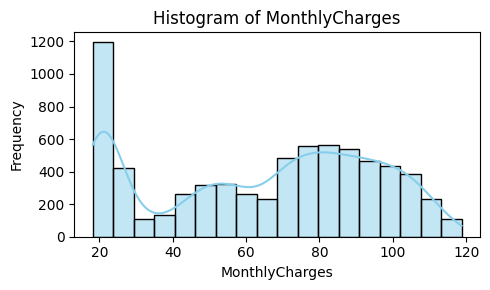

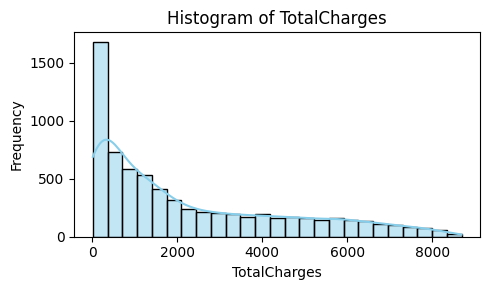

In [20]:
# Loop untuk membuat histogram dari kolom numerik
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#penjelasan :
- tenure menunjukkan distribusi lama berlangganan pelanggan, dengan puncak tertinggi pada 0-10 bulan, menandakan banyaknya pelanggan baru yang berhenti berlangganan dalam waktu singkat. Setelah periode awal ini, frekuensi berkurang dan cenderung stabil hingga sekitar 60 bulan. Terdapat sedikit peningkatan di bagian akhir (sekitar 70 bulan), yang menunjukkan bahwa pelanggan dengan masa berlangganan sangat lama cenderung lebih setia.
- MonthlyCharges menunjukkan distribusi biaya bulanan yang dibayar pelanggan, dengan puncak tinggi pada kisaran 20-30, menandakan banyaknya pelanggan yang membayar biaya rendah. Setelah puncak awal, distribusi cukup merata antara 40 hingga 100, dengan sedikit variasi. Hal ini menunjukkan bahwa meskipun terdapat variasi dalam biaya bulanan, sebagian besar pelanggan membayar dalam kisaran tersebut.
- TotalCharges menunjukkan distribusi total biaya yang telah dibayar oleh pelanggan, dengan puncak tertinggi pada kisaran 0-1000, menandakan banyaknya pelanggan baru yang belum menghabiskan banyak uang. Frekuensi menurun secara eksponensial seiring bertambahnya total biaya, menunjukkan bahwa hanya sedikit pelanggan yang telah membayar dalam jumlah besar. Distribusi ini mencerminkan bahwa mayoritas pelanggan berada pada tahap awal atau belum terlalu lama berlangganan sehingga total biaya yang dibayarkan masih relatif rendah.

###Membuat boxplot untuk mengidentifikasi outlier

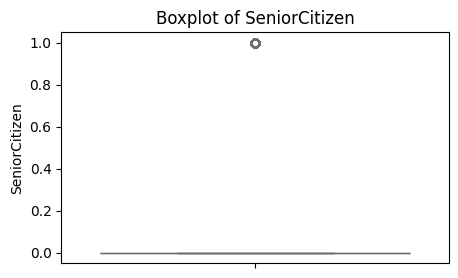

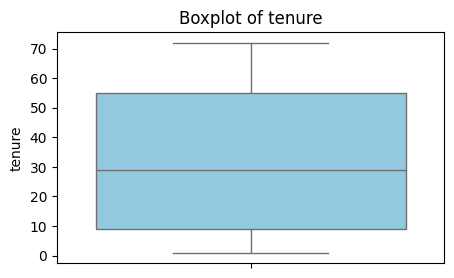

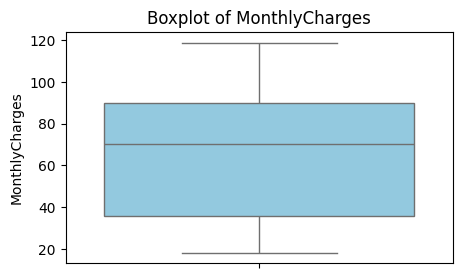

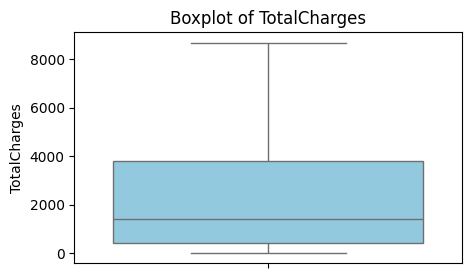

In [21]:
for col in numeric_columns:
    # Boxplot
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

penjelasan bahwa Tidak ada outliers di kolom  tenure, MonthlyCharges, TotalCharges

###Analisis Univariat untuk Kolom Kategorikal:

- Menampilkan frekuensi dan proporsi kategori
- Membuat bar plot untuk melihat distribusi kategori

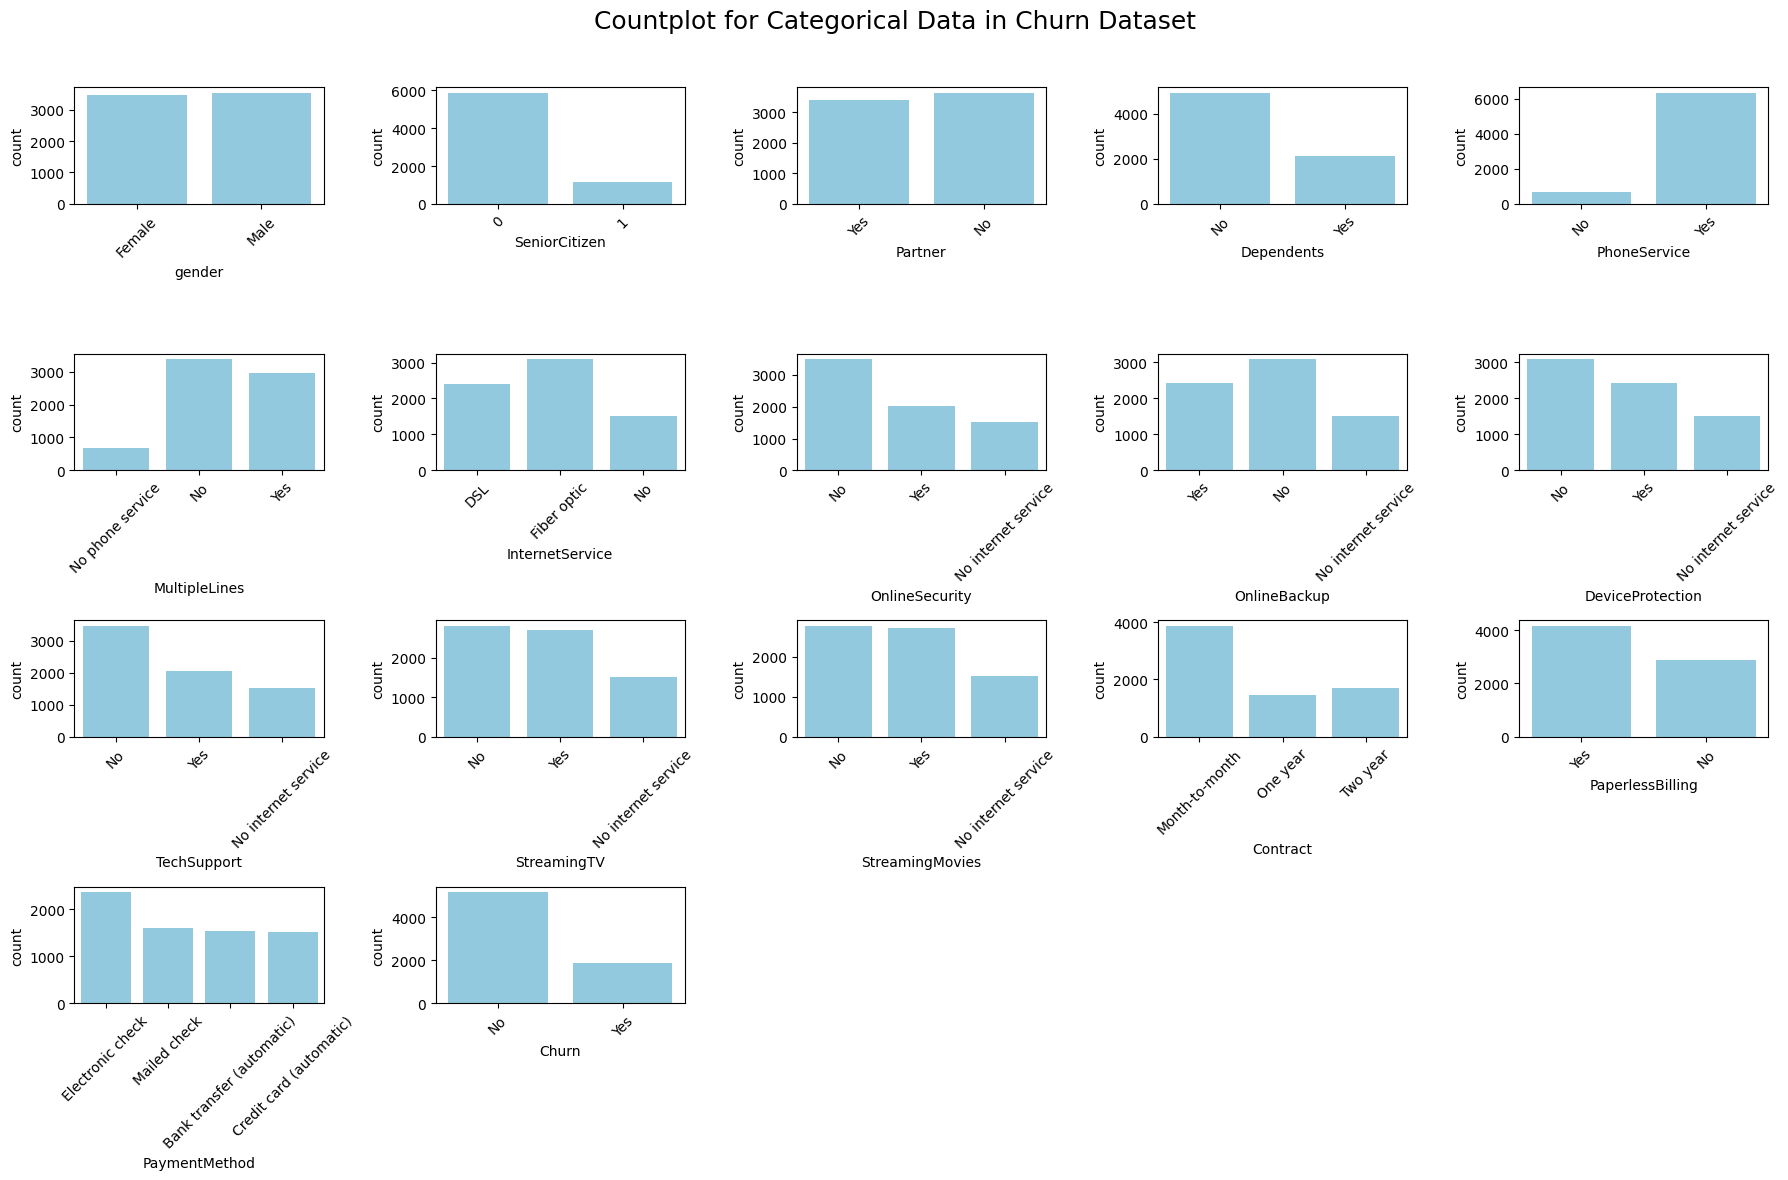

In [22]:
# Tentukan ukuran figure secara lebih proporsional
plt.figure(figsize=(18, 12))

# Tentukan jumlah baris dan kolom dari subplot agar lebih proporsional
n_rows = 4
n_cols = 5

# Loop melalui setiap kolom dalam daftar 'kategorik'
for i, col in enumerate(kategorik, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=df[col], color='skyblue')
    plt.xlabel(col)
    plt.xticks(rotation=45)

# Menambahkan judul utama untuk semua subplot
plt.suptitle('Countplot for Categorical Data in Churn Dataset', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Tampilkan plot
plt.show()

#penjelasan ;

- gender : Jumlah pelanggan wanita dan pria memiliki jumlah yang sama banyak
- Senior citizen: Customer paling banyak merupakan bukan senior citizen
- Partner: Mayoritas pelanggan tidak memiliki pasangan, yang mungkin mempengaruhi keputusan berlangganan.
-Dependents: Sebagian besar pelanggan tidak memiliki tanggungan, yang dapat berdampak pada loyalitas.
-PhoneService: Hampir semua pelanggan menggunakan layanan telepon, menandakan pentingnya layanan ini.
-MultipleLines: Sebagian besar pelanggan tidak memiliki layanan telepon ganda, menunjukkan preferensi untuk kesederhanaan.
-InternetService : Layanan fiber optic paling banyak dipilih, menunjukkan preferensi untuk kecepatan internet.
-OnlineSecurity : Banyak pelanggan tidak menggunakan layanan keamanan online, mungkin karena kurangnya kesadaran.
-OnlineBackup : Rendahnya penggunaan layanan backup online menunjukkan perlunya edukasi.
-DeviceProtection : Banyak pelanggan tidak menggunakan perlindungan perangkat, menandakan potensi risiko.
-TechSupport : Tingkat penggunaan layanan dukungan teknis yang rendah mungkin menunjukkan kenyamanan pelanggan.
-StreamingTV : Rendahnya penggunaan layanan streaming TV dan film menunjukkan peluang untuk promosi.
-Contract : Banyak pelanggan memilih kontrak bulanan, menunjukkan keinginan untuk fleksibilitas.
-PaperlessBilling : Pelanggan lebih memilih penagihan tanpa kertas, menunjukkan kesadaran lingkungan.
-PaymentMethod : Pembayaran melalui cek elektronik lebih populer, mencerminkan kenyamanan transaksi digital.
-Churn : Mayoritas pelanggan tidak melakukan churn, menunjukkan kepuasan tetapi memerlukan analisis lebih dalam.



#Analisis multivariat, yaitu analisis yang melibatkan lebih dari satu variabel.

Analisis Korelasi untuk Kolom Numerik:

Menghitung matriks korelasi
Membuat heatmap untuk visualisasi korelasi

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<ipython-input-24-323d61364177>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(


Text(0.5, 1.0, 'Customer Distribution Contract by Churn')

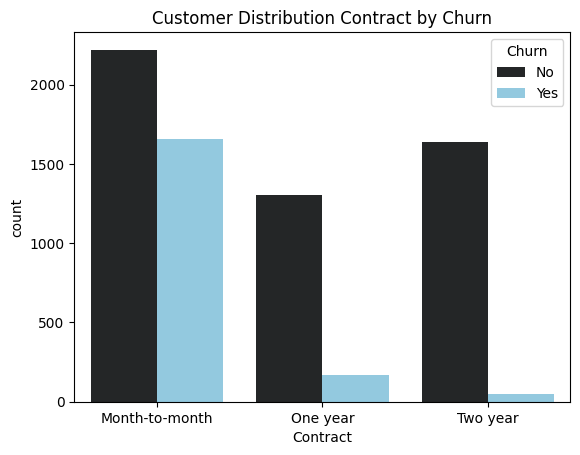

In [24]:
sns.countplot(
    data= df, x= 'Contract', hue='Churn', color='skyblue'
)
plt.title('Customer Distribution Contract by Churn')

In [25]:
# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df.select_dtypes(include=['number']).corr()

In [26]:
# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

Matriks Korelasi:
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


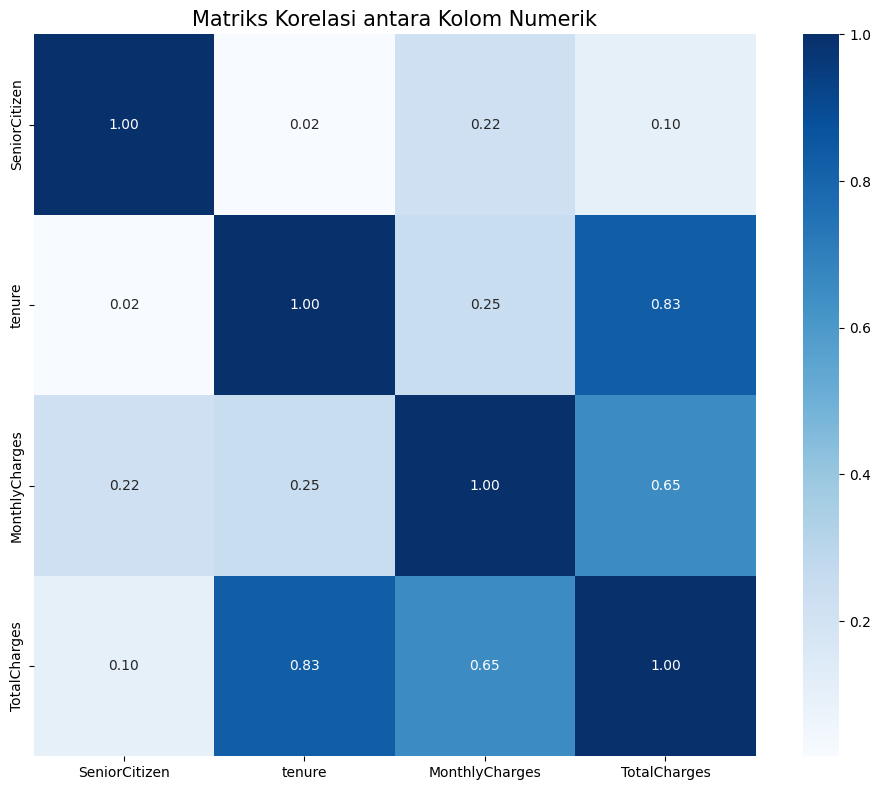

In [27]:
# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True)
plt.title('Matriks Korelasi antara Kolom Numerik', fontsize=15)
plt.tight_layout()
plt.show()

In [28]:
# Menghitung korelasi antara Total Charges dan Tenure
correlation = df['TotalCharges'].corr(df['tenure'])
print(f'Koefisien Korelasi antara Total Charges dan Tenure: {correlation:.2f}')

Koefisien Korelasi antara Total Charges dan Tenure: 0.83


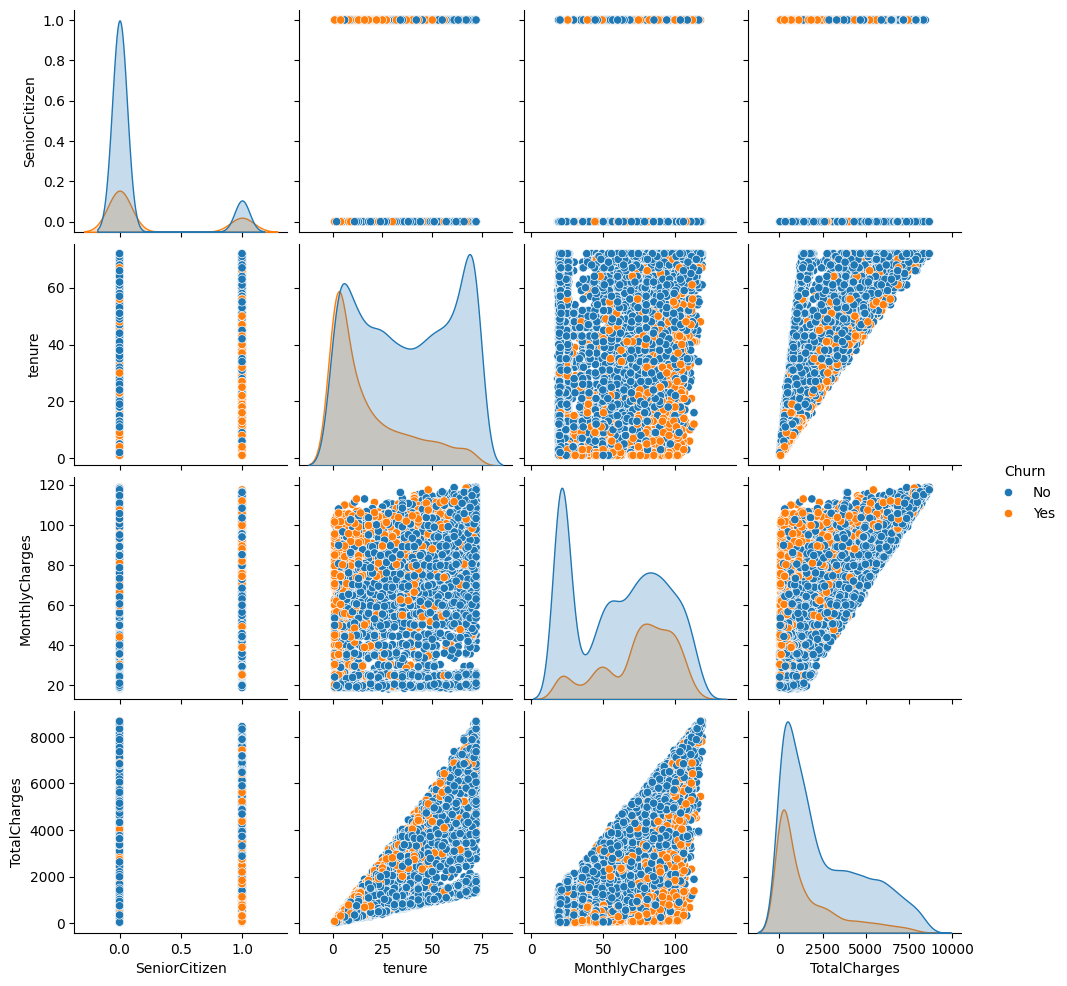

In [29]:
# Pairplot untuk Kombinasi Variabel Numerik
sns.pairplot(df, hue='Churn') # Changed 'data' to 'df'
plt.show()

penjelasan;

- Distribusi SeniorCitizen menunjukkan bahwa sebagian besar pelanggan bukan warga senior. Namun, pelanggan senior cenderung lebih sering churn, mengindikasikan bahwa status senioritas mungkin memengaruhi keputusan untuk berhenti berlangganan.
- Terdapat hubungan kuat antara masa berlangganan (tenure) dan churn, di mana pelanggan dengan tenure rendah lebih sering churn, terutama dalam beberapa bulan pertama, sedangkan pelanggan yang bertahan lebih lama cenderung memiliki tingkat churn yang lebih rendah.
- Biaya bulanan (MonthlyCharges) juga berpengaruh, dengan pelanggan yang membayar lebih tinggi cenderung lebih mungkin untuk churn, menunjukkan bahwa biaya yang tinggi dapat memicu ketidakpuasan.
- terdapat korelasi positif antara tenure dan TotalCharges, di mana pelanggan yang bertahan lebih lama biasanya memiliki TotalCharges lebih tinggi. Namun, pelanggan dengan TotalCharges rendah, yang umumnya adalah pelanggan baru atau dengan tenure rendah, lebih sering churn, menegaskan bahwa pelanggan baru cenderung lebih tidak stabil dan lebih rentan untuk berpindah layanan.

###4.Eksplorasi Mendalam:
- Ajukan minimal dua pertanyaan eksploratif yang ingin Anda jawab melalui data.
- Lakukan analisis mendalam untuk menjawab pertanyaan-pertanyaan tersebut, dengan setidaknya satu pertanyaan melibatkan agregasi berkelompok (group-by aggregation).


#pertanyaan
#1. Proporsi Pelanggan yang Churn berdasarkan Jenis Kontrak

In [30]:
# Menghitung proporsi pelanggan yang churn berdasarkan jenis kontrak
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

<Figure size 800x500 with 0 Axes>

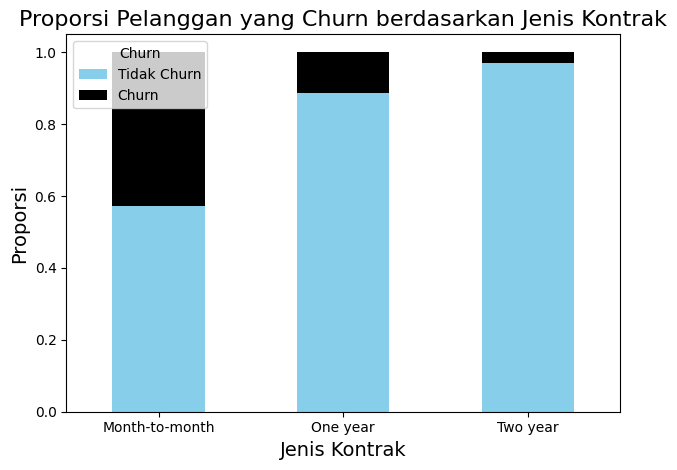

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


In [31]:
# Visualisasi
plt.figure(figsize=(8, 5))
contract_churn.plot(kind='bar', stacked=True, color=['skyblue', 'black'])
plt.title('Proporsi Pelanggan yang Churn berdasarkan Jenis Kontrak', fontsize=16)
plt.xlabel('Jenis Kontrak', fontsize=14)
plt.ylabel('Proporsi', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.tight_layout()
plt.show()

print(contract_churn)

Insight : Pelanggan yang menggunakan kontrak bulanan lebih mungkin untuk churn dibandingkan dengan mereka yang memiliki kontrak jangka panjang (satu tahun atau dua tahun). dan Semakin lama durasi kontrak, semakin kecil kemungkinan pelanggan untuk churn. Hal ini bisa menunjukkan bahwa pelanggan dengan kontrak jangka panjang merasa lebih terikat atau memiliki komitmen lebih tinggi dengan layanan yang mereka gunakan.

#pertanyaan
#2.Rata-rata Biaya Bulanan Pelanggan berdasarkan Jenis Kelamin dan Status Churn

In [32]:
# Menghitung rata-rata biaya bulanan berdasarkan jenis kelamin dan status churn
average_monthly_by_gender = df.groupby(['gender', 'Churn'])['MonthlyCharges'].mean().reset_index()

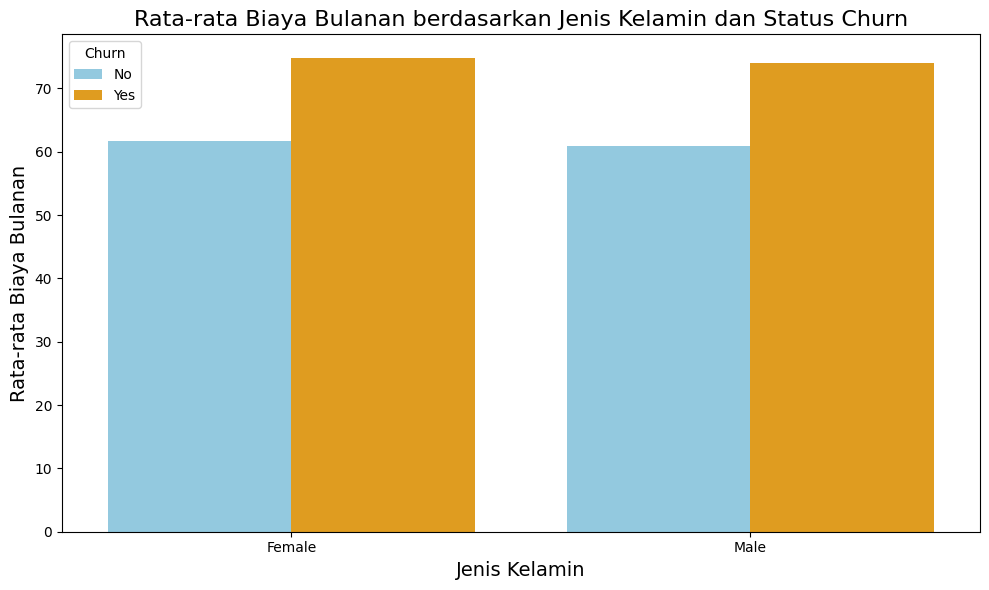

   gender Churn  MonthlyCharges
0  Female    No       61.674941
1  Female   Yes       74.812087
2    Male    No       60.950401
3    Male   Yes       74.066989


In [33]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=average_monthly_by_gender, x='gender', y='MonthlyCharges', hue='Churn', palette=['skyblue', 'orange']) # Changed palette to a list of colors
plt.title('Rata-rata Biaya Bulanan berdasarkan Jenis Kelamin dan Status Churn', fontsize=16)
plt.xlabel('Jenis Kelamin', fontsize=14)
plt.ylabel('Rata-rata Biaya Bulanan', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print(average_monthly_by_gender)

Insight ; pelanggan yang melakukan churn cenderung memiliki rata-rata biaya bulanan yang lebih tinggi dibandingkan dengan pelanggan yang tidak melakukan churn, baik untuk pelanggan perempuan maupun laki-laki. Hal ini bisa mengindikasikan bahwa biaya bulanan yang tinggi mungkin menjadi salah satu faktor yang menyebabkan pelanggan berhenti berlangganan.

# 4. Hipotesis

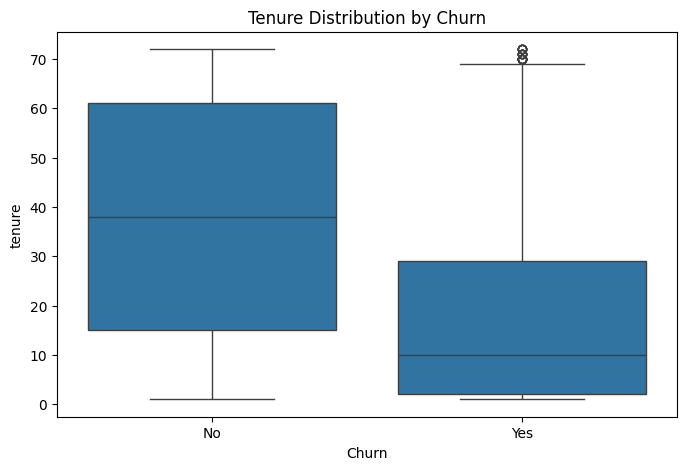

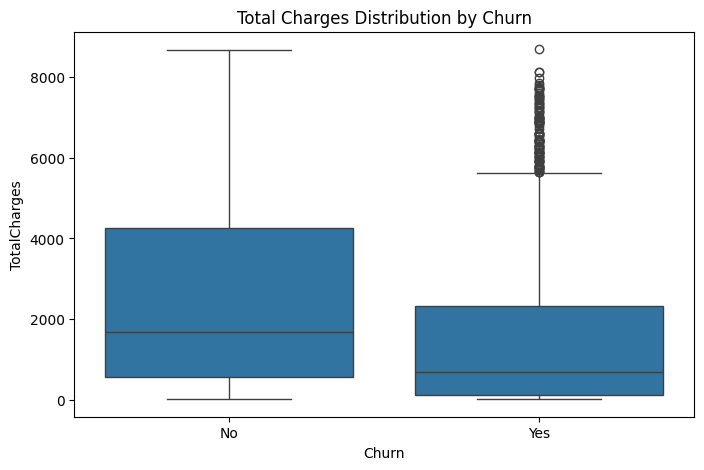

In [34]:

# - Hipotesis: Pelanggan dengan tenure rendah atau total charges rendah cenderung churn.
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure Distribution by Churn')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges Distribution by Churn')
plt.show()

#Split Dataset

In [35]:
# Convert 'TotalCharges' column to string type before using .str accessor
df['TotalCharges'] = df['TotalCharges'].astype(str)
df= df[df['TotalCharges'].str.strip() != ' ']
df['TotalCharges'] =pd.to_numeric(df['TotalCharges'], errors='coerce')

In [36]:
df = df.dropna(subset=['TotalCharges'])

In [37]:
X = df.drop(['Churn'],axis = 1)
y = df['Churn']

X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_.shape, X_test.shape

((5625, 20), (1407, 20))

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=0.20, random_state=42)

# Menampilkan bentuk dari X_train dan X_val
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")

Shape of X_train: (4500, 20)
Shape of X_val: (1125, 20)


In [39]:
X_train.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5221,5336-UFNZP,Female,1,Yes,Yes,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,107.45,7047.50
5500,7139-JZFVG,Male,0,Yes,Yes,60,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Bank transfer (automatic),60.50,3694.45
4520,3506-LCJDC,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.95,19.95


#Data Preprocessing split

In [40]:
X_train = X_train.drop('customerID', axis=1)

In [41]:
X_test = X_test.drop('customerID', axis=1)

In [42]:
X_train.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [43]:
# Mengambil kolom yang bukan numerik
kolom_non_numerik = X_train.select_dtypes(exclude=['number']).columns.tolist()
kolom_non_numerik

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [44]:
from sklearn.preprocessing import LabelEncoder # import the LabelEncoder from sklearn

label_encoder = LabelEncoder() # Now you can use the LabelEncoder class

In [45]:
X_train['gender'] = X_train['gender'].astype('category').cat.codes #encoding
X_train['Partner'] = X_train['Partner'].astype('category').cat.codes
X_train['Dependents'] = X_train['Dependents'].astype('category').cat.codes
X_train['PhoneService'] = X_train['PhoneService'].astype('category').cat.codes
X_train['MultipleLines'] = X_train['MultipleLines'].astype('category').cat.codes
X_train['InternetService'] = X_train['InternetService'].astype('category').cat.codes
X_train['OnlineSecurity'] = X_train['OnlineSecurity'].astype('category').cat.codes
X_train['OnlineBackup'] = X_train['OnlineBackup'].astype('category').cat.codes
X_train['DeviceProtection'] = X_train['DeviceProtection'].astype('category').cat.codes
X_train['TechSupport'] = X_train['TechSupport'].astype('category').cat.codes
X_train['StreamingTV'] = X_train['StreamingTV'].astype('category').cat.codes
X_train['StreamingMovies'] = X_train['StreamingMovies'].astype('category').cat.codes
X_train['Contract'] = X_train['Contract'].astype('category').cat.codes
X_train['PaperlessBilling'] = X_train['PaperlessBilling'].astype('category').cat.codes
X_train['PaymentMethod'] = X_train['PaymentMethod'].astype('category').cat.codes
y_train = y_train.astype('category').cat.codes
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4500 entries, 5221 to 1743
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4500 non-null   int8   
 1   SeniorCitizen     4500 non-null   int64  
 2   Partner           4500 non-null   int8   
 3   Dependents        4500 non-null   int8   
 4   tenure            4500 non-null   int64  
 5   PhoneService      4500 non-null   int8   
 6   MultipleLines     4500 non-null   int8   
 7   InternetService   4500 non-null   int8   
 8   OnlineSecurity    4500 non-null   int8   
 9   OnlineBackup      4500 non-null   int8   
 10  DeviceProtection  4500 non-null   int8   
 11  TechSupport       4500 non-null   int8   
 12  StreamingTV       4500 non-null   int8   
 13  StreamingMovies   4500 non-null   int8   
 14  Contract          4500 non-null   int8   
 15  PaperlessBilling  4500 non-null   int8   
 16  PaymentMethod     4500 non-null   int8   
 1

In [46]:
X_test['gender'] = X_test['gender'].astype('category').cat.codes #encoding
X_test['Partner'] = X_test['Partner'].astype('category').cat.codes
X_test['Dependents'] = X_test['Dependents'].astype('category').cat.codes
X_test['PhoneService'] = X_test['PhoneService'].astype('category').cat.codes
X_test['MultipleLines'] = X_test['MultipleLines'].astype('category').cat.codes
X_test['InternetService'] = X_test['InternetService'].astype('category').cat.codes
X_test['OnlineSecurity'] = X_test['OnlineSecurity'].astype('category').cat.codes
X_test['OnlineBackup'] = X_test['OnlineBackup'].astype('category').cat.codes
X_test['DeviceProtection'] = X_test['DeviceProtection'].astype('category').cat.codes
X_test['TechSupport'] = X_test['TechSupport'].astype('category').cat.codes
X_test['StreamingTV'] = X_test['StreamingTV'].astype('category').cat.codes
X_test['StreamingMovies'] = X_test['StreamingMovies'].astype('category').cat.codes
X_test['Contract'] = X_test['Contract'].astype('category').cat.codes
X_test['PaperlessBilling'] = X_test['PaperlessBilling'].astype('category').cat.codes
X_test['PaymentMethod'] = X_test['PaymentMethod'].astype('category').cat.codes
y_test = y_test.astype('category').cat.codes
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1407 entries, 2481 to 3984
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1407 non-null   int8   
 1   SeniorCitizen     1407 non-null   int64  
 2   Partner           1407 non-null   int8   
 3   Dependents        1407 non-null   int8   
 4   tenure            1407 non-null   int64  
 5   PhoneService      1407 non-null   int8   
 6   MultipleLines     1407 non-null   int8   
 7   InternetService   1407 non-null   int8   
 8   OnlineSecurity    1407 non-null   int8   
 9   OnlineBackup      1407 non-null   int8   
 10  DeviceProtection  1407 non-null   int8   
 11  TechSupport       1407 non-null   int8   
 12  StreamingTV       1407 non-null   int8   
 13  StreamingMovies   1407 non-null   int8   
 14  Contract          1407 non-null   int8   
 15  PaperlessBilling  1407 non-null   int8   
 16  PaymentMethod     1407 non-null   int8   
 1

In [47]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2481,1,1,1,0,61,1,2,2,1,1,1,1,1,1,2,0,0,25.00,1501.75
6784,0,0,0,0,19,1,2,2,1,1,1,1,1,1,0,0,0,24.70,465.85
6125,1,0,1,0,13,1,2,1,0,0,2,0,2,2,0,1,1,102.25,1359.00
3052,1,0,1,0,37,1,2,0,2,0,0,0,0,0,0,1,3,55.05,2030.75
4099,0,0,0,0,6,0,1,0,2,0,0,0,0,0,0,0,0,29.45,161.45


In [48]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5221,0,1,1,1,65,1,2,1,0,2,2,0,2,2,1,1,2,107.45,7047.50
5500,1,0,1,1,60,1,0,0,2,2,2,0,0,0,2,0,0,60.50,3694.45
4520,1,0,1,1,1,1,0,2,1,1,1,1,1,1,0,0,0,19.95,19.95
5124,0,0,1,1,25,1,0,2,1,1,1,1,1,1,2,0,3,20.10,486.05
5326,1,0,1,1,15,1,0,2,1,1,1,1,1,1,0,1,2,20.00,288.05


In [49]:
y_train.value_counts()

,count
0,3308
1,1192


In [50]:
from imblearn import under_sampling, over_sampling


# Undersampling
X_train, y_train = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)

In [51]:
y_train.value_counts()

,count
0,1192
1,1192


In [52]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
767,1,0,0,0,14,1,0,2,1,1,1,1,1,1,1,0,0,20.40,275.70
6443,0,0,0,0,9,1,0,2,1,1,1,1,1,1,0,0,0,19.50,150.35
5142,0,0,0,0,66,1,2,1,2,2,2,2,2,0,1,1,0,104.55,6779.05
451,0,1,0,0,22,1,0,0,2,0,2,2,0,2,0,1,3,69.75,1545.40
790,0,0,1,1,60,0,1,0,2,0,2,2,2,2,2,0,1,59.85,3590.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,1,0,0,0,1,1,2,1,0,0,0,0,2,0,0,0,2,84.50,84.50
3344,1,0,0,0,10,1,2,1,0,0,0,0,0,0,0,1,3,74.15,811.80
6986,0,0,1,0,30,1,2,1,0,2,0,2,2,0,0,1,1,94.10,2804.45
489,1,0,0,1,1,1,2,1,0,0,0,0,0,0,0,1,2,74.35,74.35


In [57]:
from sklearn.preprocessing import StandardScaler #scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_std_train = scaler.transform(X_train)
X_std_test = scaler.transform(X_test)

fit itu mempelajari
transform untuk mengubah data

#Modeling

data preprocessing > modeling > evaluasi

In [60]:
# 1. Decision Tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [62]:
from sklearn.metrics import f1_score # import f1_score
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) # Fit and transform X_train to create X_train_std
y_train_pred = dt_model.predict(X_train_std)
from sklearn.metrics import classification_report
print(f1_score(y_train, y_train_pred))

0.7623445825932504


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [64]:
#EVALUASI test
#Decision Tree
from sklearn.preprocessing import StandardScaler # import StandardScaler

scaler = StandardScaler() # Create a StandardScaler object
X_test_std = scaler.fit_transform(X_test) # Fit and transform X_test to create X_test_std

y_test_pred = dt_model.predict(X_test_std)
from sklearn.metrics import classification_report
print(f1_score(y_test, y_test_pred))

0.5072765072765073


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [65]:
# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
#EVALUASI train
#Random Forest
y_train_pred_rf = rf_model.predict(X_train_std)
from sklearn.metrics import classification_report
print(f1_score(y_train, y_train_pred_rf))

0.746915638546182


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
#EVALUASI test
#Random Forest
y_test_pred_rf = rf_model.predict(X_test_std)
from sklearn.metrics import classification_report
print(f1_score(y_test, y_test_pred_rf))

0.4942294636795655


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [68]:
import xgboost as xgb

# Initialize and fit the XGBoost model with enable_categorical=True if needed
modelXGB = xgb.XGBClassifier(random_state=42, enable_categorical=True) # Set enable_categorical=True if using categorical features
modelXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
#EVALUASI train
#Random Forest
y_train_pred_xgb = rf_model.predict(X_train_std)
from sklearn.metrics import classification_report
print(f1_score(y_train, y_train_pred_xgb))

0.746915638546182


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [70]:
#EVALUASI train
#Random Forest
y_test_pred_xgb = rf_model.predict(X_test_std)
from sklearn.metrics import classification_report
print(f1_score(y_test, y_test_pred_xgb))

0.4942294636795655


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
